<a href="https://colab.research.google.com/github/Shrey-Viradiya/HandsOnMachineLearning/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = iris.data[:, 2:] # petal length and width
y = iris.target


np.random.seed(259)
rnd_idx = np.random.permutation(len(X))

X = X[rnd_idx]
y = y[rnd_idx]

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
export_graphviz(
        tree_clf,
        out_file='iris_tree.dot',
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [6]:
!dot -Tpng iris_tree.dot -o iris_tree.png

<img src='iris_tree.png'>

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

In [8]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap='summer')
    if not iris:
        plt.contour(x1, x2, y_pred, cmap='summer', alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

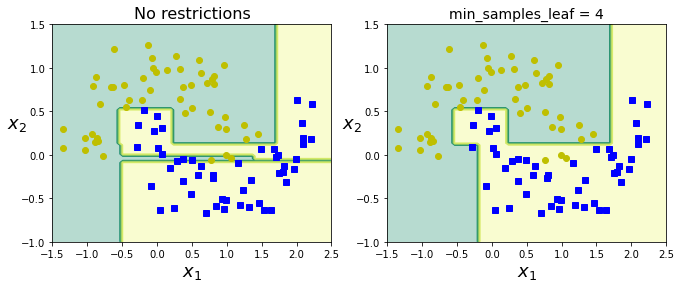

In [9]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples = 100, noise = 0.2, random_state = 259)

deep_tree_clf1 = DecisionTreeClassifier(random_state = 259)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 4, random_state = 259)

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize= (11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes = [-1.5, 2.5, -1, 1.5], iris = False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

In [10]:
export_graphviz(
        deep_tree_clf1,
        out_file='make_moons1.dot',
        feature_names=['X1', 'X2'],
        class_names=['Moon1','Moon2'],
        rounded=True,
        filled=True
    )
export_graphviz(
        deep_tree_clf2,
        out_file='make_moons2.dot',
        feature_names=['X1', 'X2'],
        class_names=['Moon1','Moon2'],
        rounded=True,
        filled=True
    )

In [11]:
!dot -Tpng make_moons1.dot -o make_moons1.png
!dot -Tpng make_moons2.dot -o make_moons2.png

In [12]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(Xm,ym)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [13]:
export_graphviz(
        tree_reg,
        out_file='tree_regression.dot',
        feature_names=['X1', 'X2'],
        class_names=['Moon1','Moon2'],
        rounded=True,
        filled=True,
    )

In [14]:
!dot -Tpng tree_regression.dot -o tree_regression.png

In [15]:
import matplotlib.image as mpimg

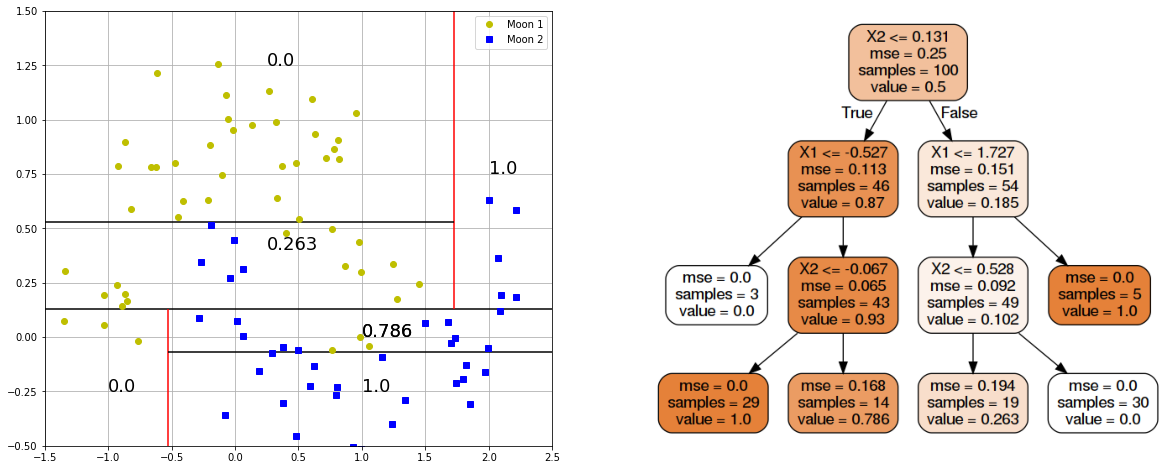

In [16]:
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.plot(Xm[:, 0][ym==0], Xm[:, 1][ym==0], "yo", label="Moon 1")
plt.plot(Xm[:, 0][ym==1], Xm[:, 1][ym==1], "bs", label="Moon 2")


plt.xlim(-1.5,2.5)
plt.ylim(-0.5,1.5)
plt.hlines(0.131,-1.5,2.5)
plt.vlines(-0.527,-0.75, 0.131,'r')
plt.hlines(-0.067, -0.527, 2.5)
plt.vlines(1.727,0.131, 1.5,'r')
plt.hlines(0.528, -1.5, 1.727)

plt.text(-1.0, -0.25, '0.0', fontsize = 18)
plt.text(1.0, -0.25, '1.0', fontsize = 18)
plt.text(1.0, 0.0 , '0.786', fontsize = 18)
plt.text(1.0, 0.0 , '0.786', fontsize = 18)
plt.text(2.0, 0.75 , '1.0', fontsize = 18)
plt.text(0.25, 0.4 , '0.263', fontsize = 18)
plt.text(0.25, 1.25 , '0.0', fontsize = 18)


plt.legend()
plt.grid(True)


plt.subplot(122)

image = mpimg.imread("tree_regression.png")
plt.imshow(image)
plt.axis(False)
plt.show()